# 24 Time Series Prediction with Multilayer Perceptrons

## 24.1 Problem Description: Time Series Prediction

In [ ]:
from pandas import read_csv
import matplotlib.pyplot as plt
dataset = read_csv('international-airline-passengers.csv', usecols=[1], engine='python',
    skipfooter=3)
plt.plot(dataset)
plt.show()

## 24.2 Multilayer Perceptron Regression

In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python',
    skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

In [ ]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# Train Score: 531.71 MSE (23.06 RMSE)
# Test Score: 2355.07 MSE (48.53 RMSE)

In [ ]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## 24.3 Multilayer Perceptron Using the Window Method

Using TensorFlow backend.


96 48


/Users/dchou/tensorflow/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/200
0s - loss: 81982.4453
Epoch 2/200
0s - loss: 70507.7300
Epoch 3/200
0s - loss: 62886.4110
Epoch 4/200
0s - loss: 57959.9696
Epoch 5/200
0s - loss: 55161.8080
Epoch 6/200
0s - loss: 53486.8618
Epoch 7/200
0s - loss: 52209.6265
Epoch 8/200
0s - loss: 51446.8734
Epoch 9/200
0s - loss: 51349.9052
Epoch 10/200
0s - loss: 51331.2786
Epoch 11/200
0s - loss: 51312.7583
Epoch 12/200
0s - loss: 51294.2447
Epoch 13/200
0s - loss: 51275.7920
Epoch 14/200
0s - loss: 51257.2960
Epoch 15/200
0s - loss: 51238.7137
Epoch 16/200
0s - loss: 51220.2484
Epoch 17/200
0s - loss: 51201.5073
Epoch 18/200
0s - loss: 51182.8958
Epoch 19/200
0s - loss: 51164.1096
Epoch 20/200
0s - loss: 51145.3309
Epoch 21/200
0s - loss: 51126.5729
Epoch 22/200
0s - loss: 51107.7902
Epoch 23/200
0s - loss: 51088.8939
Epoch 24/200
0s - loss: 51069.9870
Epoch 25/200
0s - loss: 51051.2423
Epoch 26/200
0s - loss: 51032.2700
Epoch 27/200
0s - loss: 51013.3242
Epoch 28/200
0s - loss: 50994.5024
Epoch 29/200
0s - loss: 50975

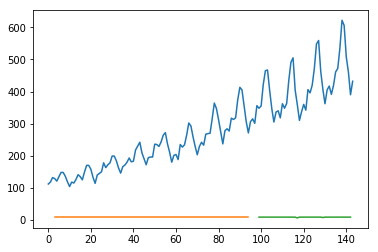

In [1]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python',
    skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
                                                  
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# 畫出來的圖與 pdf 大大不同

In [2]:
testPredict

array([[ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 6.39084148],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 7.69828653],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.86415195],
       [ 8.69962692],
       [ 8.86415195]], dtype=float32)